Biblioteki wykorzystane w zadaniu.

In [42]:
import matplotlib.pyplot as plt
import math
import numpy as np

Klasa Punkt.

In [43]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    #Definiowanie porównania
    def __lt__(self, other):
        if self.y == other.y:
            return self.x < other.x
        return self.y < other.y

Funkcja zwracjaąca oczytane z pliku punkty.

In [44]:
def read_file(file):
    points = []
    with open(file, 'r') as file:
        lines = file.readlines()[1:]  # Pominięcie pierwszej linii
        for line in lines:
            x, y = map(float, line.strip().split())
            points.append(Point(x, y))
    return points

Funkcja sprawdzająca po której stronie odcinka b-c leży punkt a.

Zwraca:
  - "> 0" jeśli a leży na lewo od b-c
  - "< 0" jeśli a leży na prawo od b-c
  - "0" jeśli a, b, c są współliniowe


  Wzór na wyznacznik dla trzech punktów:


  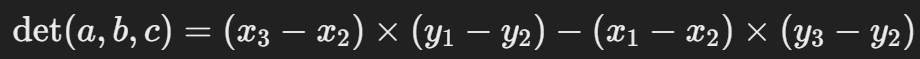

In [45]:
def det(a, b, c):
    return (c.x - b.x) * (a.y - b.y) - (a.x - b.x) * (c.y - b.y)

Tworzenie otoczki wypukłej - metoda Jarvis'a



In [46]:
def jarvis_hull(points):
  # Jeśli mniej niż 3 punkty, to nie możemy utworzyć otoczki
    number_of_points  = len(points)
    if number_of_points < 3:
        return []

    hull = []
    min_point = min(points, key=lambda p: (p.y, p.x))  # Punkt o najmniejszych współrzędnych y potem x (początek)

    # # Dodanie punktu o najmniejszych współrzędnych jako pierwszy punkt na otoczce
    hull.append(min_point)
    #Inicjalizacja następnego punktu do sprawdzenia jako pierwszy punkt z listy
    next_point = points[0]
    while True:
        for point_to_check in points[1:]:
            # Szukamy punktu, który jest najbardziej na lewo od odcinka utworzonego przez punkt na
            # otoczce i następny sprawdzany punkt
            if det(point_to_check , hull[-1], next_point) > 0:
                next_point = point_to_check

        if next_point == hull[0]:  # Sprawdzamy pierwszy dodany punkt
            break

        hull.append(next_point) # Dodajemy następny punkt otoczki
        next_index = points.index(next_point) # Indeks następnego punktu w liście
        next_index = (next_index + 1) % number_of_points   # Przechodzimy cyklicznie przez listę
        next_point = points[next_index] # Następny punkt do sprawdzenia staje się punktem o indeksie next_index

    return hull

Obliczanie kąta między dwoma punktami

In [47]:
def angle_between_points(point1, point2, point3):
    # Obliczanie wektorów pomiędzy punktami
    vector1 = (point1.x - point2.x, point1.y - point2.y)
    vector2 = (point3.x - point2.x, point3.y - point2.y)

    # Obliczanie długości wektorów
    length_vector1 = math.sqrt(vector1[0]**2 + vector1[1]**2)
    length_vector2 = math.sqrt(vector2[0]**2 + vector2[1]**2)

    if length_vector1 == 0 or length_vector2 == 0:
        return float('inf')  # Sygnalizacja problemu z obliczeniem kąta

    # Obliczanie iloczynu skalarnego i kąta między wektorami
    dot_product = vector1[0] * vector2[0] + vector1[1] * vector2[1]
    cos_angle = dot_product / (length_vector1 * length_vector2)

    # Ograniczenie wartości cos_angle do przedziału [-1, 1]
    cos_angle = max(-1, min(1, cos_angle))

    # Obliczanie kąta w radianach i zamiana na stopnie
    angle_rad = math.acos(cos_angle)
    angle_deg = math.degrees(angle_rad)

    return angle_deg

In [48]:
def jarvis_convex_hull(points):
    number_of_points = len(points)
    if number_of_points < 3:
        return []  # Zbyt mało punktów, nie można utworzyć otoczki wypukłej

    hull = []  # Lista punktów otoczki wypukłej
    start_point = min(points, key=lambda p: (p.y, p.x))  # Znajdź punkt startowy

    hull.append(start_point)
    current_point = start_point  # Aktualnie rozpatrywany punkt

    while True:
        next_point_to_check = points[0]  # Początkowo wybierz pierwszy punkt jako następny
        for candidate_point in points[1:]:
            angle = angle_between_points(current_point, next_point_to_check, candidate_point)
            if angle < angle_between_points(current_point, next_point_to_check, next_point_to_check):
                next_point_to_check = candidate_point

        if next_point_to_check == start_point:
            break  # Wróć do punktu startowego, kończ otoczkę
        else:
            hull.append(next_point_to_check)
            current_point = next_point_to_check  # Przesuń się do nowego punktu

    return hull


Tworzenie otoczki wypukłej - metoda Graham'a

In [49]:
def graham(points):
    if len(points) < 3:
        return points

    lowest_point = min(points, key=lambda p: (p.y, p.x))  # Znajdź punkt o najniższych współrzędnych y, a w przypadku równych y - najniższych x
    sorted_points = sort_points_by_polar_angle(points, lowest_point) #sortowanie wg najmniejszego kata
    convex_hull = [lowest_point, sorted_points[0], sorted_points[1]]

    # szukamy 3 punktow tworzacych skret w lewo
    for point in sorted_points[2:]:
        while len(convex_hull) > 1 and orientation(convex_hull[-2], convex_hull[-1], point) != 2:
            convex_hull.pop()
        convex_hull.append(point)

    if convex_hull[-1] != lowest_point:
        convex_hull.append(lowest_point)

    return convex_hull

Obliczanie orientacji trzech punktów względem siebie:
* 0 - punkty wspoliniowe
* 1 - punkty tworza skret w lewo
* 2 - punkty nie tworza skretu w lewo

Według wzoru:


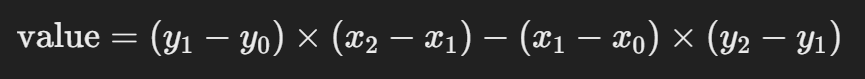

In [50]:
def orientation(point0, point1, point2):
      value = (point1.y - point0.y) * (point2.x - point1.x) - (point1.x - point0.x) * (point2.y - point1.y)
      if value == 0:
          return 0
      elif value > 0:
          return 1
      else:
          return 2

Sortowanie punktu względem kąta polarnego względem danego punktu zakotwiczenia.

In [51]:
def sort_points_by_polar_angle(points, anchor):
    return sorted(points, key=lambda x: (polar_angle(anchor, x), distance(anchor, x)))

Funkcja oblicza odległość między dwoma punktami na płaszczyźnie za pomocą normy euklidesowej.

In [52]:
def distance(point0, point1):
    return np.linalg.norm(np.array([point1.x, point1.y]) - np.array([point0.x, point0.y]))

Funkcja obliczająca kąt polarny między dwoma punktami w przestrzeni dwuwymiarowej.

In [53]:
def polar_angle(point0, point1):
    return np.arctan2(point1.y - point0.y, point1.x - point0.x)

Funkcja przedstawiająca graficznie wyniki.

In [54]:
def show_points(points, color):
  x_values = [point.x for point in points]
  y_values = [point.y for point in points]

  plt.scatter(x_values, y_values, label='Points', color=color)

Program główny:

Zastowanie metody Jarvis'a
Dla pliku 'Ksztalt_2'


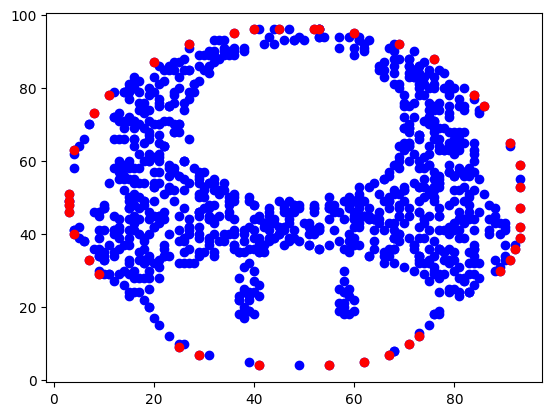

Dla pliku 'Ksztalt_2'


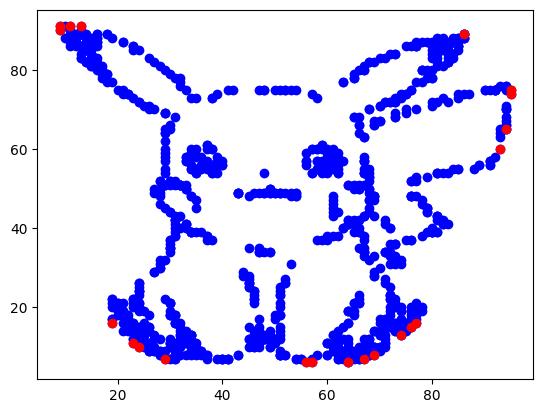

Zastosowanie metody Graham'a
Dla pliku 'Ksztalt_3'


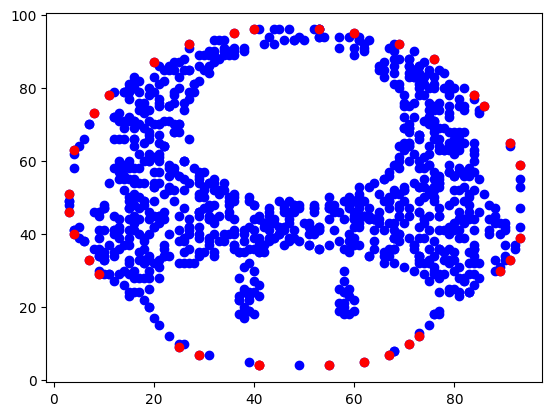

Dla pliku 'Ksztalt_3'


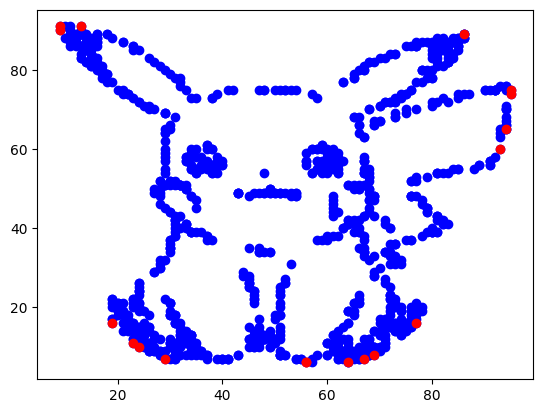

In [55]:
def main():
  #Odczyt z pliku
  points = read_file("ksztalt_2.txt")
  points2 = read_file("ksztalt_3.txt")

  print("Zastowanie metody Jarvis'a")
  print("Dla pliku 'Ksztalt_2'")
  show_points(points, 'blue')
  result = jarvis_hull(points)
  show_points(result, 'red')
  plt.show()

  print("Dla pliku 'Ksztalt_2'")
  show_points(points2, 'blue')
  result = jarvis_hull(points2)
  show_points(result, 'red')
  plt.show()

  print("Zastosowanie metody Graham'a")
  print("Dla pliku 'Ksztalt_3'")
  show_points(points, 'blue')
  result = graham(points)
  show_points(result, 'red')
  plt.show()

  print("Dla pliku 'Ksztalt_3'")
  show_points(points2, 'blue')
  result = graham(points2)
  show_points(result, 'red')
  plt.show()

if __name__ == "__main__":
    main()